In [28]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns

#Upload from csv
data_set_path = "Maternal Health Risk Data Set.csv"
#Read data and results
data_df = pd.read_csv(data_set_path)

data_df.head(10)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


# Clean the data

In [29]:
#get the number of rows and columbns in data
data_df.shape

(1014, 7)

In [30]:
#Check Data Types
data_df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [31]:
# Check the information for data
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [32]:
# check for any null values
print(data_df.isnull())

        Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0     False       False        False  False     False      False      False
1     False       False        False  False     False      False      False
2     False       False        False  False     False      False      False
3     False       False        False  False     False      False      False
4     False       False        False  False     False      False      False
...     ...         ...          ...    ...       ...        ...        ...
1009  False       False        False  False     False      False      False
1010  False       False        False  False     False      False      False
1011  False       False        False  False     False      False      False
1012  False       False        False  False     False      False      False
1013  False       False        False  False     False      False      False

[1014 rows x 7 columns]


In [33]:
#List of all columns
data_df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [34]:
# find any duplicate rows
duplicate_rows = data_df[data_df.duplicated()]
duplicate_rows

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [35]:
# remove the duplicate rows from data
data_df.drop_duplicates(inplace=True)
data_df.shape

(452, 7)

In [36]:
# look for the ststistics
data_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [37]:
# Define statistical count
statistical_count = data_df.describe()

# Calculate quartiles, IQR, outliers, min, and max for each feature
for i in statistical_count.columns:
    # Quartiles
    q1 = statistical_count.loc['25%', i]
    q2 = statistical_count.loc['50%', i]
    q3 = statistical_count.loc['75%', i]
    
    # Interquartile Range (IQR)
    iqr = q3 - q1
    
    # Outlier range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Outliers
    outliers = data_df[(data_df[i] < lower_bound) | (data_df[i] > upper_bound)][i]
    
    # Minimum and Maximum
    minimum = statistical_count.loc['min', i]
    maximum = statistical_count.loc['max', i]
    
    # Print results
    print(f"Statistics for {i}:")
    print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Outliers: {outliers.tolist()}")
    print(f"Minimum: {minimum}, Maximum: {maximum}")
    print("\n")


Statistics for Age:
Q1: 19.0, Q2: 25.0, Q3: 35.0
IQR: 16.0
Lower Bound: -5.0, Upper Bound: 59.0
Outliers: [60, 60, 60, 60, 63, 60, 60, 60, 62, 65, 60, 66, 70, 65, 60, 60, 60, 60, 65, 60, 60, 60, 60]
Minimum: 10.0, Maximum: 70.0


Statistics for SystolicBP:
Q1: 90.0, Q2: 120.0, Q3: 120.0
IQR: 30.0
Lower Bound: 45.0, Upper Bound: 165.0
Outliers: []
Minimum: 70.0, Maximum: 160.0


Statistics for DiastolicBP:
Q1: 65.0, Q2: 80.0, Q3: 86.0
IQR: 21.0
Lower Bound: 33.5, Upper Bound: 117.5
Outliers: []
Minimum: 49.0, Maximum: 100.0


Statistics for BS:
Q1: 6.9, Q2: 7.5, Q3: 7.9
IQR: 1.0
Lower Bound: 5.4, Upper Bound: 9.4
Outliers: [15.0, 13.0, 11.0, 18.0, 11.0, 15.0, 18.0, 12.0, 16.0, 12.0, 15.0, 15.0, 11.0, 18.0, 17.0, 15.0, 15.0, 18.0, 11.0, 15.0, 19.0, 18.0, 15.0, 19.0, 11.0, 15.0, 16.0, 11.0, 12.0, 12.0, 15.0, 15.0, 10.0, 15.0, 18.0, 11.0, 12.0, 11.0, 13.0, 15.0, 11.0, 16.0, 15.0, 18.0, 19.0, 18.0, 13.0, 15.0, 18.0, 16.0, 12.0, 16.0, 15.0, 13.0, 15.0, 13.0, 10.0, 18.0, 18.0, 11.0, 11.0, 16.

<Figure size 1200x800 with 0 Axes>

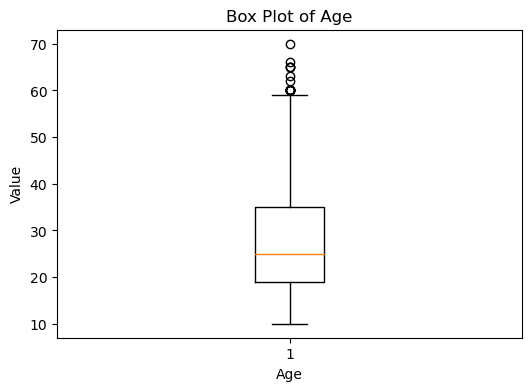

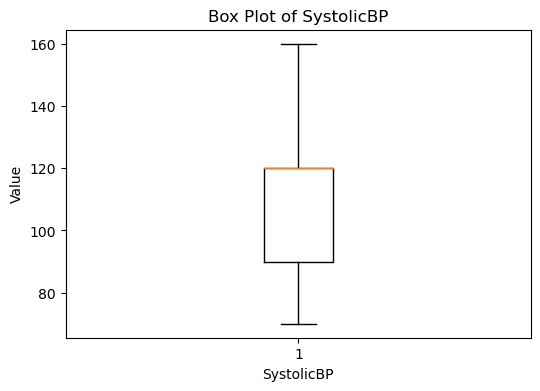

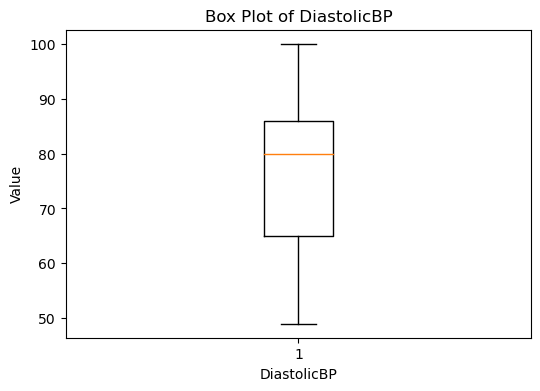

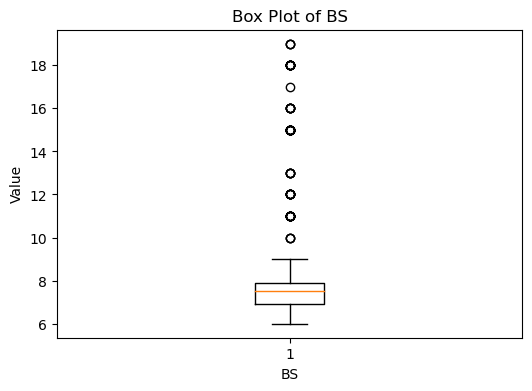

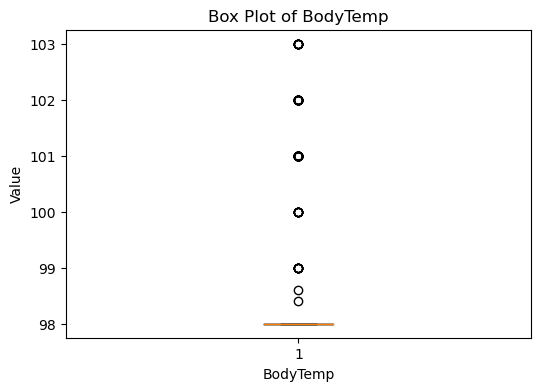

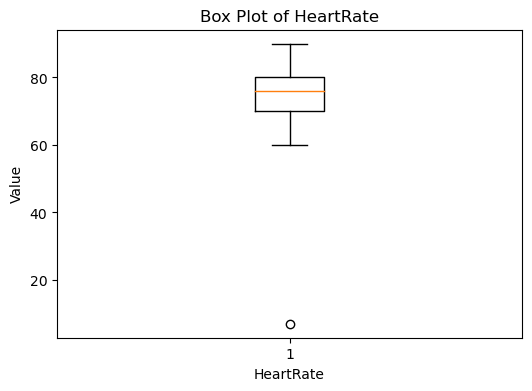

In [38]:
# Define statistical features
statistical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Plot box plots for each numerical feature
plt.figure(figsize=(12, 8))
for i in range(len(statistical_features)):
    plt.figure(figsize=(6, 4))
    plt.boxplot(data_df[statistical_features[i]])
    plt.title(f'Box Plot of {statistical_features[i]}')
    plt.xlabel(statistical_features[i])  
    plt.ylabel('Value')
    plt.show()


Analysis report:
From above calculations and boxplots,  some health variables have outliers.For now we will proceed to analyse data as it is, because removing outliers can affect outcome. As it is health data many outliers can be natural variations.

# Showing removing and not removing outliers effect


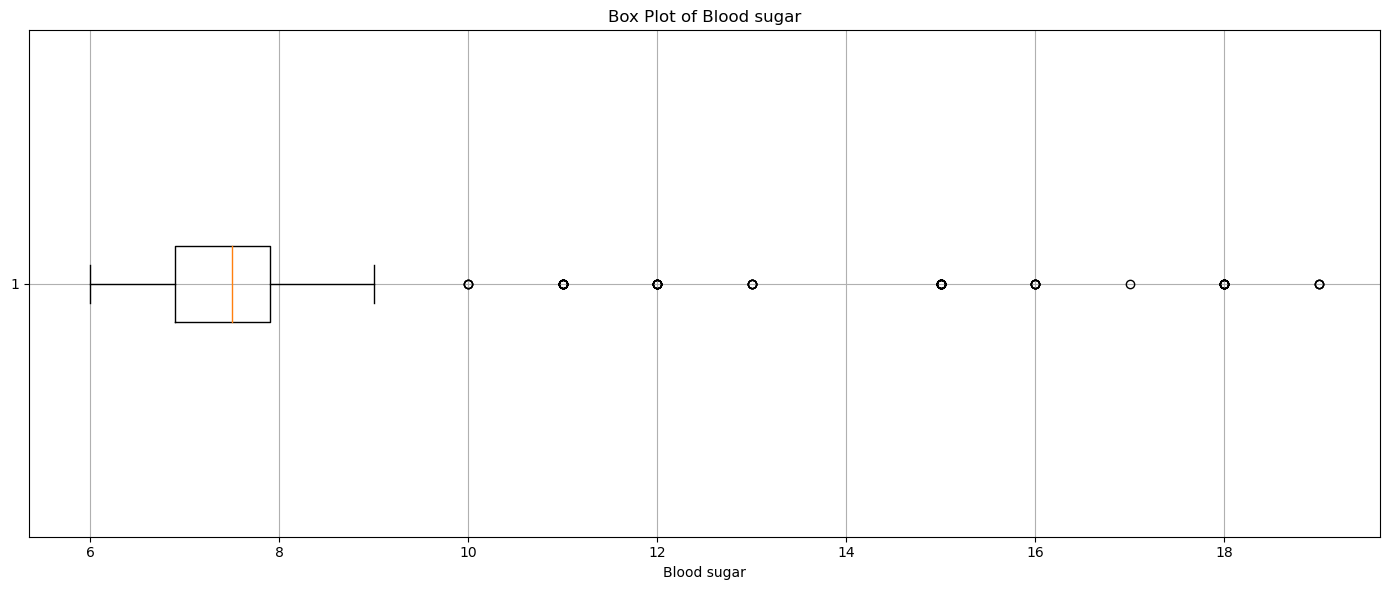

In [39]:
# Create a box plot for BS
plt.figure(figsize=(14, 6))
plt.boxplot(data_df['BS'], vert=False)

# Set labels and title
plt.xlabel('Blood sugar')
plt.title('Box Plot of Blood sugar')
plt.grid(True)
plt.tight_layout()

# Save an image of the chart
plt.savefig("Images/outlierBS.png")

# Display the chart
plt.show()


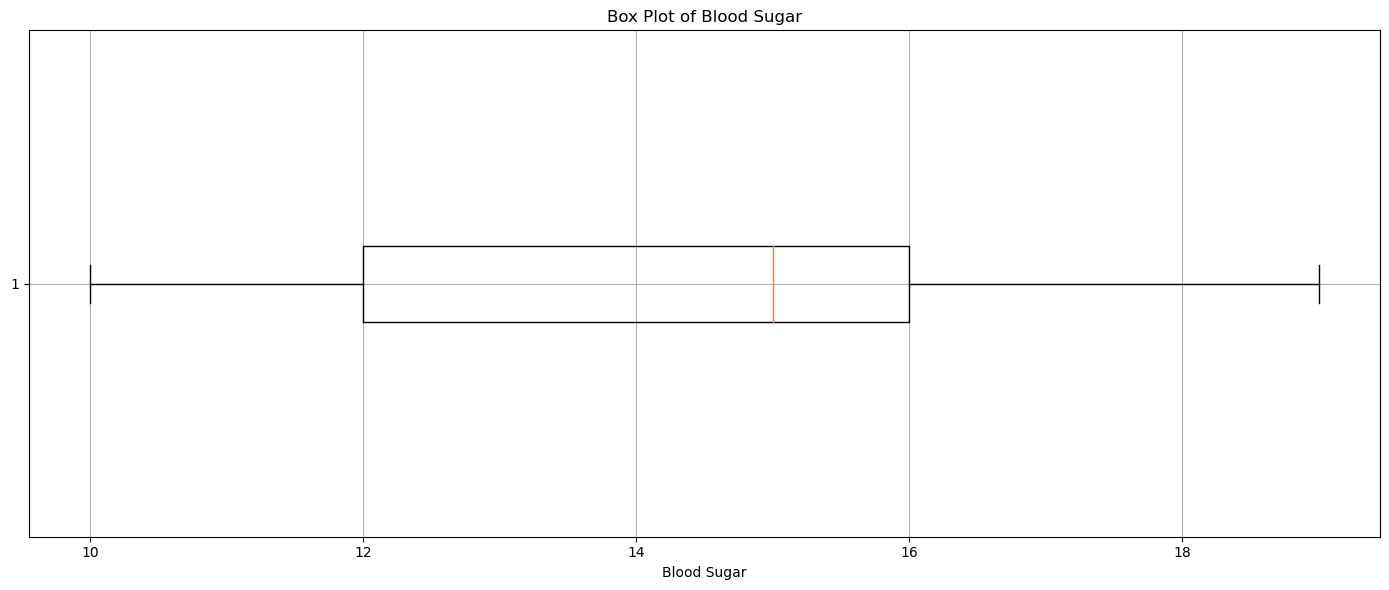

In [40]:
bs_values = [15.0, 13.0, 11.0, 18.0, 11.0, 15.0, 18.0, 12.0, 16.0, 12.0, 15.0, 15.0, 11.0, 18.0, 17.0, 15.0, 15.0, 18.0, 11.0, 15.0, 19.0, 18.0, 15.0, 19.0, 11.0, 15.0, 16.0, 11.0, 12.0, 12.0, 15.0, 15.0, 10.0, 15.0, 18.0, 11.0, 12.0, 11.0, 13.0, 15.0, 11.0, 16.0, 15.0, 18.0, 19.0, 18.0, 13.0, 15.0, 18.0, 16.0, 12.0, 16.0, 15.0, 13.0, 15.0, 13.0, 10.0, 18.0, 18.0, 11.0, 11.0, 16.0, 12.0, 11.0, 15.0, 11.0, 12.0, 10.0, 15.0, 15.0, 12.0]

# Define the threshold for outliers
threshold = 19.0

# Remove outliers
bs_no_outliers = [x for x in bs_values if x <= threshold]

# Create a box plot for BS
plt.figure(figsize=(14, 6))
plt.boxplot(bs_no_outliers, vert=False)

# Set labels and title
plt.xlabel('Blood Sugar')
plt.title('Box Plot of Blood Sugar')
plt.grid(True)
plt.tight_layout()

# Save an image of the chart
plt.savefig("Images/outlierBS1.png")

# Display the chart
plt.show()


Analysis Report:
From obersving the boxplot for Blood Sugar, there are outliers.A blood sugar level less than (7.8 mmol/L) is normal. High blood sugar levels are seen in pregnacies which can be possible in real world. If we remove the outliers our median will change along with other statistic markers like quartile,IQR,mean etc which might affect the data outcome. In this case we would like to keep outliers instead of removing them.

# Total count of risk levels 

In [41]:
# Count the occurrences of each risk level
risk_counts = data_df['RiskLevel'].value_counts()
risk_counts

low risk     234
high risk    112
mid risk     106
Name: RiskLevel, dtype: int64

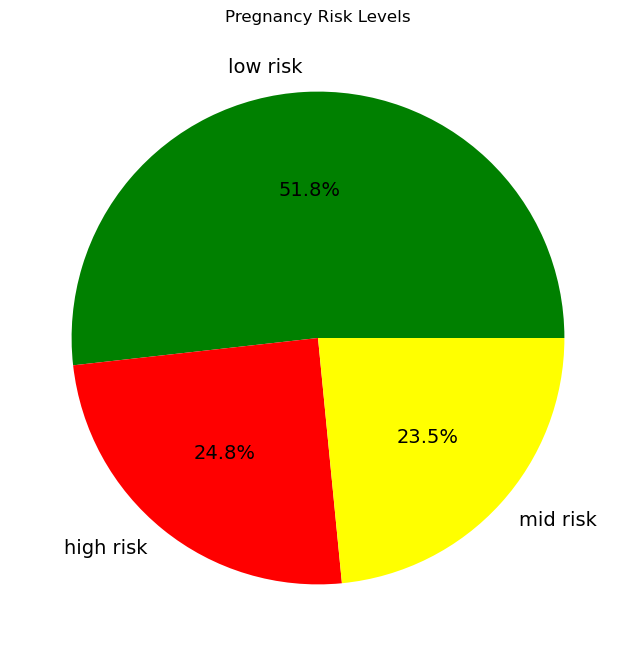

In [42]:
# Count the occurrences of each risk level
risk_counts = data_df['RiskLevel'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', colors=['green','red','yellow'],textprops={'fontsize': 14})

# Adding title
plt.title('Pregnancy Risk Levels')
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Riskpie.png")
# Show plot
plt.show()


Analysis Report:
The pie chart shows we have 51.8% low risk, 23.5.1% mid risk, and 24.8% high risk pregnancy females in our dataset. 


# Relationship between Risk level and health risk factors


# Relationship between Risk level and Age

In [43]:
# Count the age of each risk level
age_counts = data_df['Age'].unique()
age_counts

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

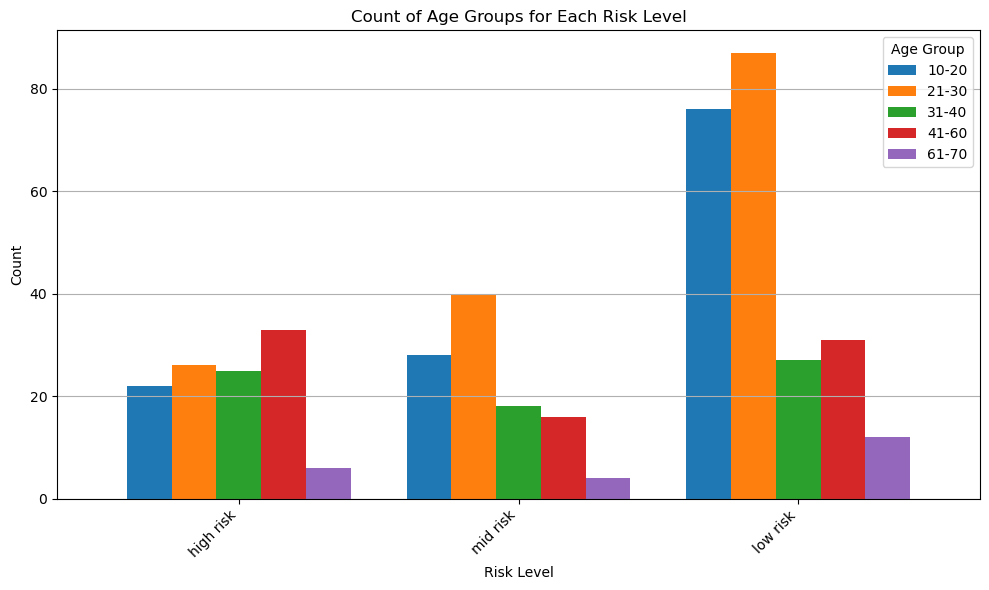

In [61]:
# Define the age bins
age_bins = [10, 20, 30, 40, 60, 70]
age_labels = ['10-20', '21-30', '31-40', '41-60','61-70']

# Bin the Age column
data_df['AgeGroup'] = pd.cut(data_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the frequency of each age group for each risk level using count()
age_group_counts = data_df.groupby(['RiskLevel', 'AgeGroup']).count()['Age']


age_group_counts = age_group_counts.unstack()

# Filter age_group_counts to include only high risk, mid risk, and low risk categories
age_group_counts_filtered = age_group_counts.loc[['high risk', 'mid risk', 'low risk']]

# Plot the grouped bar chart
age_group_counts_filtered.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Count of Age Groups for Each Risk Level')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Agerisk.png")
plt.show()


Analysis Report:
Group bar chart shows most of low risk and mid risk women fall between 10-20 and 21-30 years age group. On other hand most of high risk pregnant women fall in the age group from (31-40 years) and (41-60 years).As age increases, risk level in pregnancy increases.
           

# Relationship between Risk level and Systolic BP

In [47]:
systolic_bp_by_risk = {
    'High Risk': data_df[data_df['RiskLevel'] == 'high risk']['SystolicBP'],
    'Mid Risk': data_df[data_df['RiskLevel'] == 'mid risk']['SystolicBP'],
    'Low Risk': data_df[data_df['RiskLevel'] == 'low risk']['SystolicBP']
}

# Calculating statistics for each risk level
statistics = {}
for risk_level, bp_data in systolic_bp_by_risk.items():
    statistics[risk_level] = {
        'Min': bp_data.min(),
        'Q1': bp_data.quantile(0.25),
        'Median': bp_data.median(),
        'Q3': bp_data.quantile(0.75),
        'Max': bp_data.max(),
        'IQR': bp_data.quantile(0.75) - bp_data.quantile(0.25)
    }

# Displaying the statistics
print(statistics)


{'High Risk': {'Min': 83, 'Q1': 98.75, 'Median': 120.0, 'Q3': 140.0, 'Max': 160, 'IQR': 41.25}, 'Mid Risk': {'Min': 70, 'Q1': 100.0, 'Median': 120.0, 'Q3': 120.0, 'Max': 140, 'IQR': 20.0}, 'Low Risk': {'Min': 70, 'Q1': 90.0, 'Median': 100.0, 'Q3': 120.0, 'Max': 129, 'IQR': 30.0}}


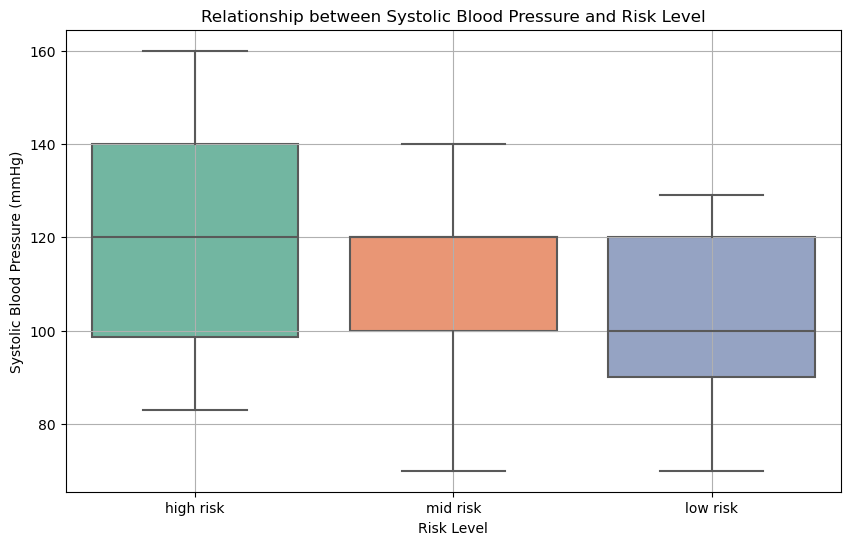

In [48]:
# Define the order of risk levels
risk_order = ['high risk', 'mid risk', 'low risk']

# Create the box plot with the specified order
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='SystolicBP', data=data_df, order=risk_order, palette='Set2')
plt.xlabel('Risk Level')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('Relationship between Systolic Blood Pressure and Risk Level')
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/BPrisk.png")
plt.show()


Analysis Report:
The normal systolic blood pressure is <120 mm Hg. Boxplot for SystolicBP and Risk level shows lower risk females have systolic BP between 90-120mmHg, Mid risk has BP between 100-120mmHg and High risk have BP between 100-140mmHg.As the Systolic BP increase >120mmHg your risk level also increases.

# Relationship between Risk level and Diastolic BP

In [49]:
Diastolic_bp_by_risk = {
    'High Risk': data_df[data_df['RiskLevel'] == 'high risk']['DiastolicBP'],
    'Mid Risk': data_df[data_df['RiskLevel'] == 'mid risk']['DiastolicBP'],
    'Low Risk': data_df[data_df['RiskLevel'] == 'low risk']['DiastolicBP']
}

# Calculating statistics for each risk level
statistics = {}
for risk_level, bp_data in Diastolic_bp_by_risk.items():
    statistics[risk_level] = {
        'Min': bp_data.min(),
        'Q1': bp_data.quantile(0.25),
        'Median': bp_data.median(),
        'Q3': bp_data.quantile(0.75),
        'Max': bp_data.max(),
        'IQR': bp_data.quantile(0.75) - bp_data.quantile(0.25)
    }

# Displaying the statistics
print(statistics)


{'High Risk': {'Min': 60, 'Q1': 68.0, 'Median': 80.0, 'Q3': 95.0, 'Max': 100, 'IQR': 27.0}, 'Mid Risk': {'Min': 50, 'Q1': 65.0, 'Median': 77.5, 'Q3': 85.0, 'Max': 100, 'IQR': 20.0}, 'Low Risk': {'Min': 49, 'Q1': 60.0, 'Median': 75.0, 'Q3': 80.0, 'Max': 100, 'IQR': 20.0}}


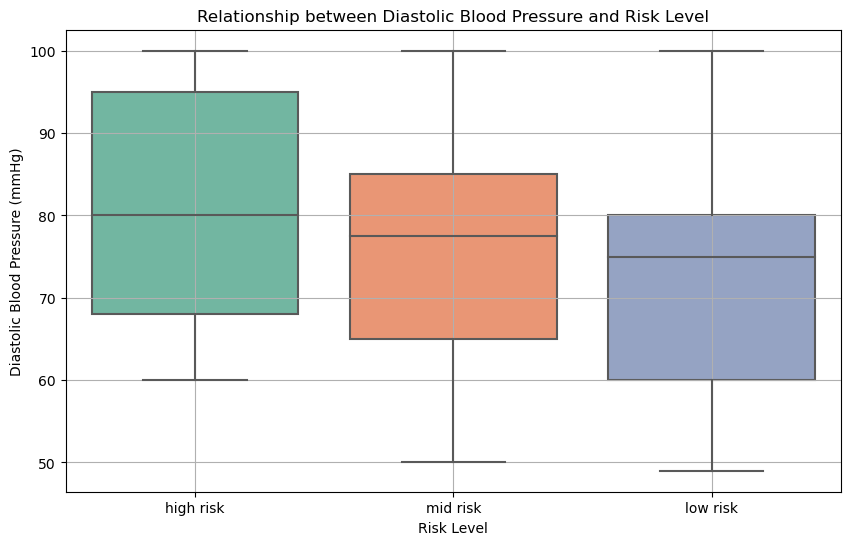

In [50]:
# Define the order of risk levels
risk_order = ['high risk', 'mid risk', 'low risk']

# Create the box plot with the specified order
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='DiastolicBP', data=data_df, order=risk_order, palette='Set2')
plt.xlabel('Risk Level')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.title('Relationship between Diastolic Blood Pressure and Risk Level')
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/DBPrisk.png")
plt.show()


Analysis Report:
The normal diastolic blood pressure is <80 mm Hg. Boxplot for diastolicBP and Risk level shows lower risk females have diastolic BP between 60-80mmHg, Mid risk has BP between 65-85mmHg and High risk have BP between 68-95mmHg.As the diastolic BP increase >80mmHg your risk level also increases.

# Relationship between Risk level and Blood Sugar

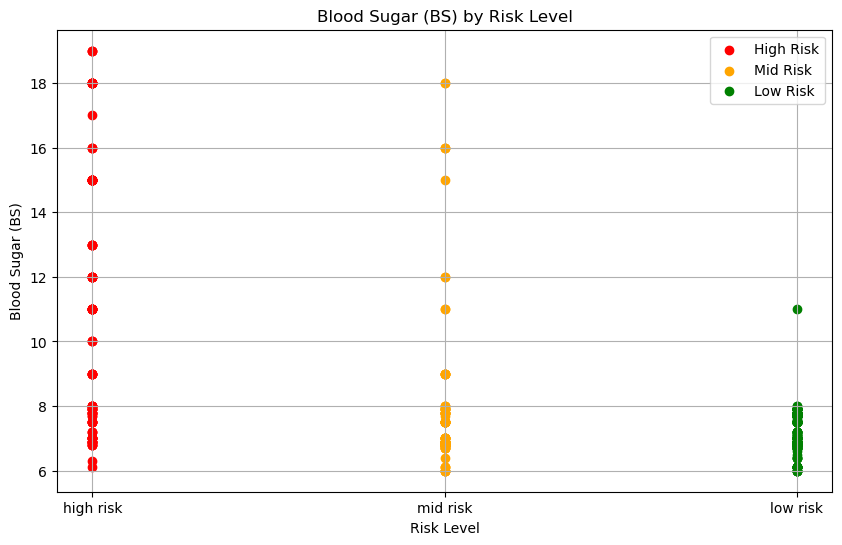

In [51]:
# Create separate DataFrames for each risk level
high_risk_data = data_df[data_df['RiskLevel'] == 'high risk']
mid_risk_data = data_df[data_df['RiskLevel'] == 'mid risk']
low_risk_data = data_df[data_df['RiskLevel'] == 'low risk']


# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for high risk
plt.scatter(high_risk_data["RiskLevel"], high_risk_data["BS"], color='red', label='High Risk')

# Scatter plot for mid risk
plt.scatter(mid_risk_data["RiskLevel"], mid_risk_data["BS"], color='orange', label='Mid Risk')

# Scatter plot for low risk
plt.scatter(low_risk_data["RiskLevel"], low_risk_data["BS"], color='green', label='Low Risk')

plt.title('Blood Sugar (BS) by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Blood Sugar (BS)')
plt.legend()
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/BSrisk.png")
plt.show()


Analysis Report:
A blood sugar level less than (7.8 mmol/L) is normal. Scatter plot shows most of sugar level values are concentrated between 6 to 8 mmol/L for all mid and low risk females. High risk group shows values ranging from 6 to 19 mmol/L. It shows as blood sugar increases > 8mmol/L your risk level increases.

# Relationship between Risk level and Heart Rate

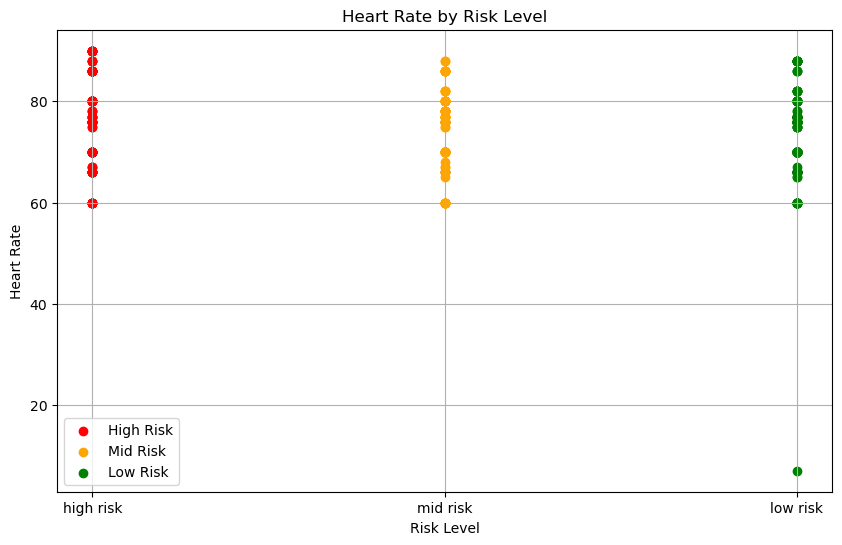

In [52]:
# Create separate DataFrames for each risk level
high_risk_data = data_df[data_df['RiskLevel'] == 'high risk']
mid_risk_data = data_df[data_df['RiskLevel'] == 'mid risk']
low_risk_data = data_df[data_df['RiskLevel'] == 'low risk']

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for high risk
plt.scatter(high_risk_data["RiskLevel"], high_risk_data["HeartRate"], color='red', label='High Risk')

# Scatter plot for mid risk
plt.scatter(mid_risk_data["RiskLevel"], mid_risk_data["HeartRate"], color='orange', label='Mid Risk')

# Scatter plot for low risk
plt.scatter(low_risk_data["RiskLevel"], low_risk_data["HeartRate"], color='green', label='Low Risk')

plt.title('Heart Rate by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Heart Rate')
plt.legend()
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Heartraterisk.png")
plt.show()


Analysis Report:
A normal resting heart rate for adults ranges from 60 to 100 beats per minute. From the above scatter plot we can say the heart rate for all risk levels falls between 60 to 90bpm, which is within normal range.Overall the heart rate and risk level do not relate.

# Relationship between Risk level and Body Temperature

Count of Body Temperature in High Risk Level:
 98.0     70
98.6      1
99.0      2
100.0     3
101.0    19
102.0    13
103.0     4
Name: BodyTemp, dtype: int64

Count of Body Temperature in Mid Risk Level:
 98.0     77
99.0      1
100.0     4
101.0    15
102.0     8
103.0     1
Name: BodyTemp, dtype: int64

Count of Body Temperature in Low Risk Level:
 98.0     207
98.4       1
99.0       5
100.0      1
101.0      7
102.0      9
103.0      4
Name: BodyTemp, dtype: int64


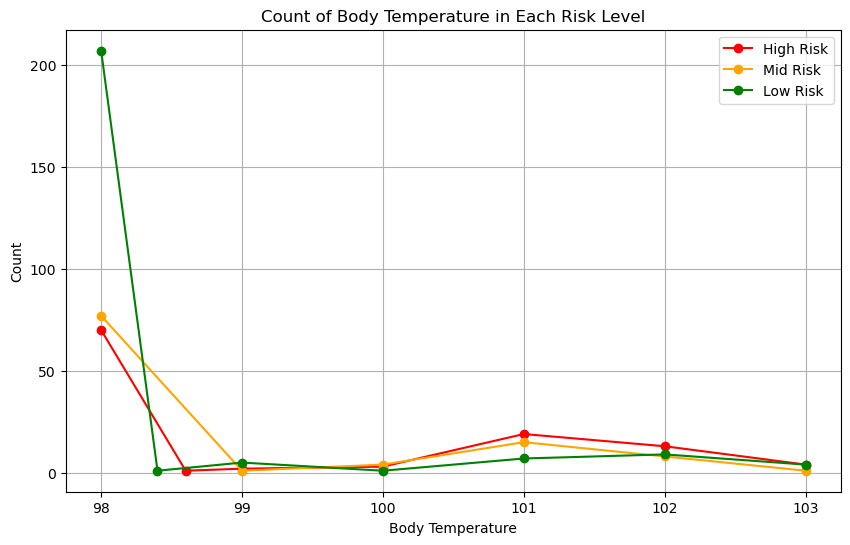

In [53]:
# Count how many Body Temperatures are in each risk category
body_temp_counts_high = data_df[data_df['RiskLevel'] == 'high risk']['BodyTemp'].value_counts().sort_index()
body_temp_counts_mid = data_df[data_df['RiskLevel'] == 'mid risk']['BodyTemp'].value_counts().sort_index()
body_temp_counts_low = data_df[data_df['RiskLevel'] == 'low risk']['BodyTemp'].value_counts().sort_index()

# Print the count of body temperature values in each risk category after sorting the index
print("Count of Body Temperature in High Risk Level:\n", body_temp_counts_high)
print("\nCount of Body Temperature in Mid Risk Level:\n", body_temp_counts_mid)
print("\nCount of Body Temperature in Low Risk Level:\n", body_temp_counts_low)

# Create a line plot
plt.figure(figsize=(10, 6))

plt.plot(body_temp_counts_high.index, body_temp_counts_high.values, color='red', marker='o', label='High Risk')
plt.plot(body_temp_counts_mid.index, body_temp_counts_mid.values, color='orange', marker='o', label='Mid Risk')
plt.plot(body_temp_counts_low.index, body_temp_counts_low.values, color='green', marker='o', label='Low Risk')

plt.xlabel('Body Temperature')
plt.ylabel('Count')
plt.title('Count of Body Temperature in Each Risk Level')
plt.legend()
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/BodyTempCounts.png")
plt.show()


Analysis Report:
Normal body temperature can range between 97 F (36.1 C) and 99 F (37.2 C). Above line plot shows all risk levels fall between normal body temperature group from 98 to 99F. No significant difference is seen in the counts at higher body temperature in high,mid and low risk. Body temperature and risk level do not relate .

# Analyse the relationship between health variables

# Relationship between Age and Systolic BP

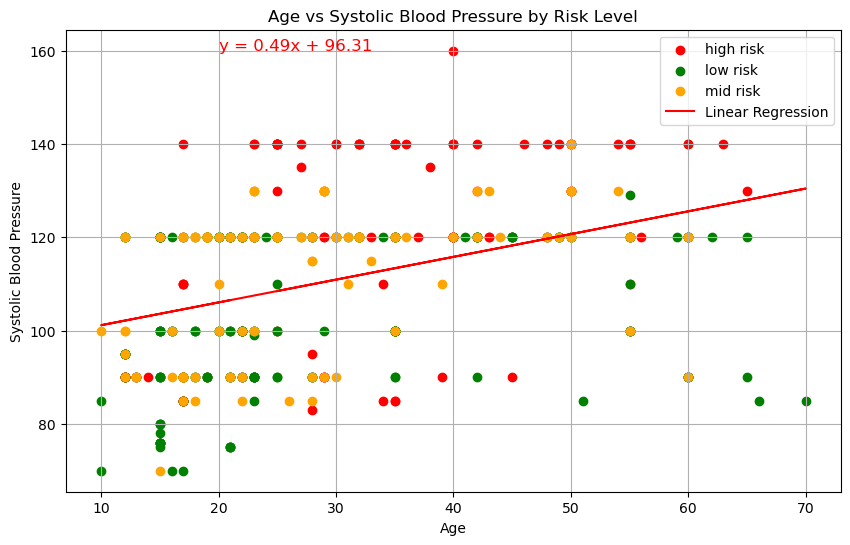

Correlation coefficient (r): 0.3759314507972975
The r square value is: 0.14132445569856092


In [54]:
# Define x_values, y_values, and risk_levels 
x_values = data_df["Age"]
y_values = data_df["SystolicBP"]
risk_levels = data_df["RiskLevel"]

# Perform linear regression analysis
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = rvalue**2

# Define colors for each risk level
colors = {'high risk': 'red', 'mid risk': 'orange', 'low risk': 'green'}

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
for risk_level in risk_levels.unique():
    plt.scatter(x_values[risk_levels == risk_level], y_values[risk_levels == risk_level], label=risk_level, color=colors[risk_level])
plt.plot(x_values, regress_values, 'r-', label='Linear Regression')

# Annotate the line equation
plt.annotate(line_eq, (20, 160), fontsize=12, color='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.title('Age vs Systolic Blood Pressure by Risk Level')
plt.legend()
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/age_sbp.png")
# Show plot
plt.show()

# Print correlation coefficient
print("Correlation coefficient (r):", rvalue)
print(f"The r square value is: {r_squared}")


Analysis Report:
A correlation coefficient (r) of 0.37 suggests a weak positive linear relationship between age and systolic blood pressure.R square value of 0.1413 means that approximately 14.13% of the variability in systolic blood pressure can be explained by age.
As systolic BP increses >120 with age, the risk level increases.

# Relationship between Age and Blood Sugar

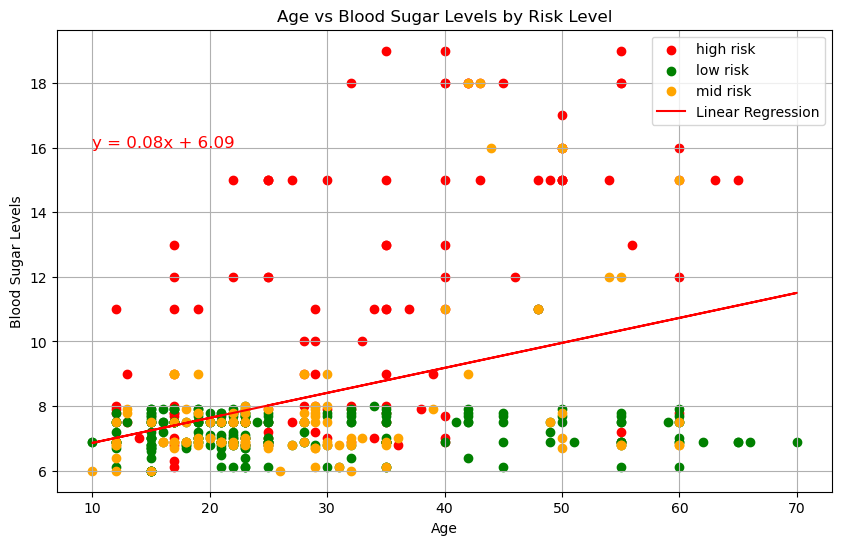

Correlation coefficient (r): 0.3766163412155406
The r square value is: 0.1418398684705805


In [55]:
# Define x_values, y_values, and risk_levels 
x_values = data_df["Age"]
y_values = data_df["BS"]
risk_levels = data_df["RiskLevel"]

# Perform linear regression analysis
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = rvalue**2

# Define colors for each risk level
colors = {'high risk': 'red', 'mid risk': 'orange', 'low risk': 'green'}

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
for risk_level in risk_levels.unique():
    plt.scatter(x_values[risk_levels == risk_level], y_values[risk_levels == risk_level], label=risk_level, color=colors[risk_level])
plt.plot(x_values, regress_values, 'r-', label='Linear Regression')

# Annotate the line equation
plt.annotate(line_eq, (10, 16), fontsize=12, color='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Blood Sugar Levels')
plt.title('Age vs Blood Sugar Levels by Risk Level')
plt.legend()
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/age_bsugar.png")
# Show plot
plt.show()

# Print correlation coefficient
print("Correlation coefficient (r):", rvalue)
print(f"The r square value is: {r_squared}")


Analysis Report:
A correlation coefficient (r) of 0.37 suggests a weak positive linear relationship between age and blood sugar.R square value of approximately 0.141 suggests that about 14.1% of the variability in blood sugar levels can be explained by age. As blood sugar increses >8  regardless of age, the risk level increases.

# Relationship between Blood sugar and Systolic BP

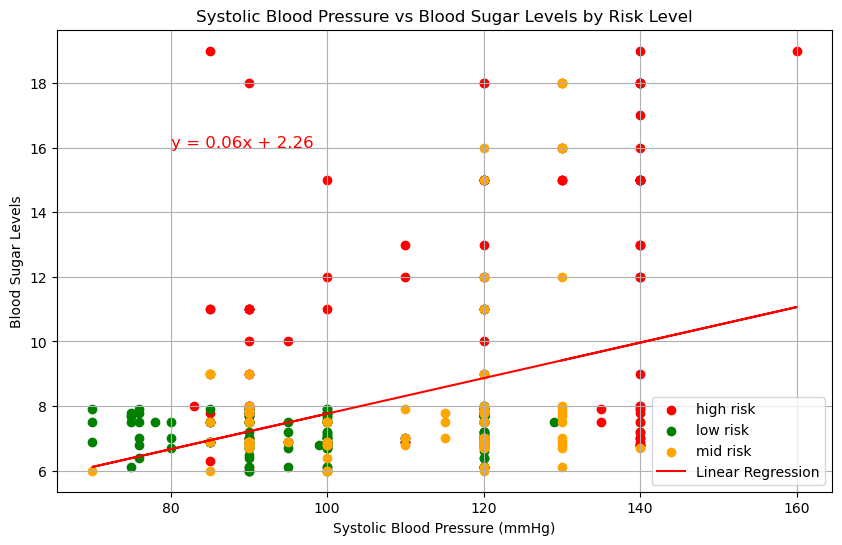

Correlation coefficient (r): 0.34753395647234264
The r square value is: 0.12077985090132015


In [56]:
# Define x_values, y_values, and risk_levels 
x_values = data_df["SystolicBP"]
y_values = data_df["BS"]
risk_levels = data_df["RiskLevel"]

# Perform linear regression analysis
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = rvalue**2

# Define colors for each risk level
colors = {'high risk': 'red', 'mid risk': 'orange', 'low risk': 'green'}

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
for risk_level in risk_levels.unique():
    plt.scatter(x_values[risk_levels == risk_level], y_values[risk_levels == risk_level], label=risk_level, color=colors[risk_level])
plt.plot(x_values, regress_values, 'r-', label='Linear Regression')

# Annotate the line equation
plt.annotate(line_eq, (80, 16), fontsize=12, color='red')

# Add labels and title
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Blood Sugar Levels')
plt.title('Systolic Blood Pressure vs Blood Sugar Levels by Risk Level')
plt.legend()
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/sbp_bsugar.png")
# Show plot
plt.show()

# Print correlation coefficient
print("Correlation coefficient (r):", rvalue)
print(f"The r square value is: {r_squared}")

Analysis Report:
A correlation coefficient (r) of 0.34 between Systolic Blood Pressure (SBP) and Blood Sugar Levels (BS) indicates a weak positive linear relationship between the two variables.R square value of approximately 0.120 between systolic blood pressure and blood sugar indicates that around 12.1% of the variability in systolic blood pressure can be explained by blood sugar levels. 
As the systolic BP increases>120 and blood sugar increases >8, the risk level increases.

# Relationship between Blood sugar and Diastolic BP

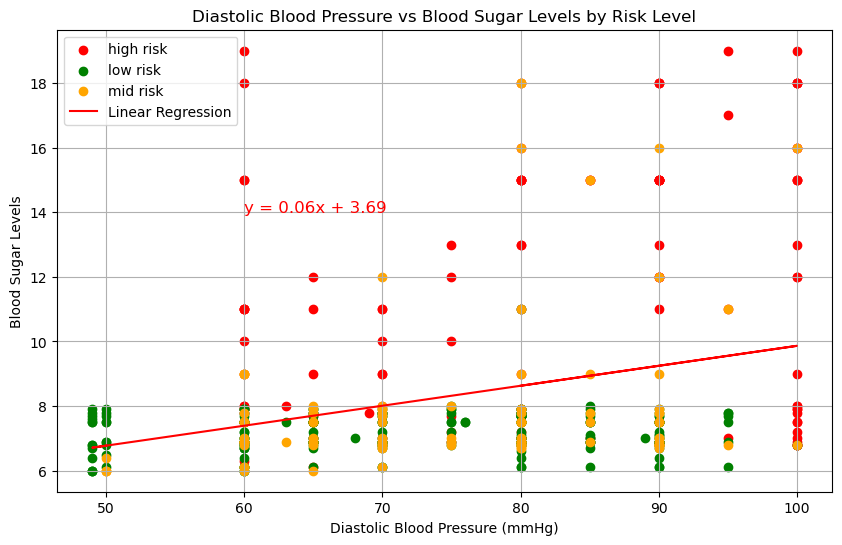

Correlation coefficient (r): 0.30042285854292494
The r square value is: 0.09025389393510229


In [57]:
# Define x_values, y_values, and risk_levels based on BS, DiastolicBP, and RiskLevel in data_df
x_values = data_df["DiastolicBP"]
y_values = data_df["BS"]
risk_levels = data_df["RiskLevel"]

# Perform linear regression analysis
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = rvalue**2

# Define colors for each risk level
colors = {'high risk': 'red', 'mid risk': 'orange', 'low risk': 'green'}

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
for risk_level in risk_levels.unique():
    plt.scatter(x_values[risk_levels == risk_level], y_values[risk_levels == risk_level], label=risk_level, color=colors[risk_level])
plt.plot(x_values, regress_values, 'r-', label='Linear Regression')

# Annotate the line equation
plt.annotate(line_eq, (60, 14), fontsize=12, color='red')

# Add labels and title
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Blood Sugar Levels')
plt.title('Diastolic Blood Pressure vs Blood Sugar Levels by Risk Level')
plt.legend()
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/DBP_bsugar.png")
# Show plot
plt.show()

# Print correlation coefficient
print("Correlation coefficient (r):", rvalue)
print(f"The r square value is: {r_squared}")

Analysis Report:
A correlation coefficient (r) of 0.30 between Diastolic Blood Pressure and Blood Sugar Levels (BS) indicates a weak positive linear relationship between the two variables.R square value of approximately 0.090 between diastolic blood pressure and blood sugar levels indicates that around 9.03% of the variability in diastolic blood pressure can be explained by blood sugar levels.
As the diastolic BP increases>90 and blood sugar increases >8, the risk level significantly increases.

# Relationship between Heart Rate and Blood Sugar

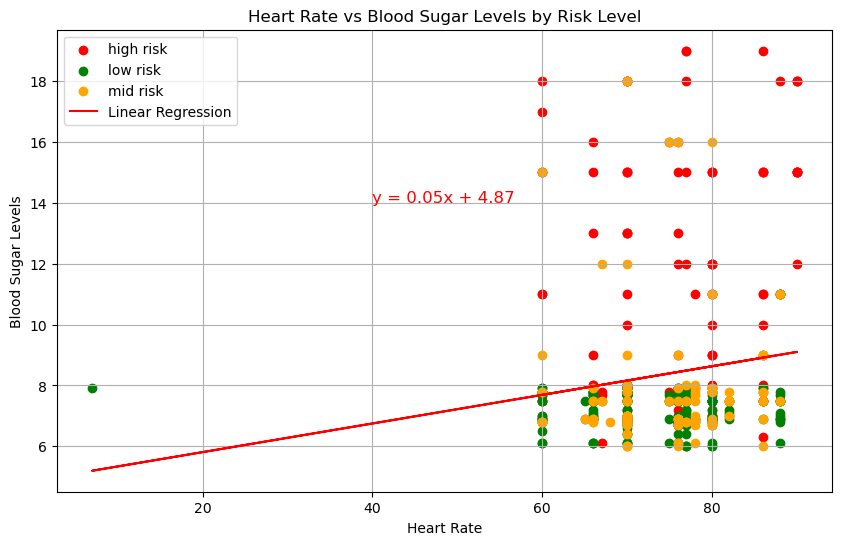

Correlation coefficient (r): 0.13560541875657545
The r square value is: 0.018388829596146183


In [58]:
# Define x_values, y_values, and risk_levels 
x_values = data_df["HeartRate"]
y_values = data_df["BS"]
risk_levels = data_df["RiskLevel"]

# Perform linear regression analysis
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = rvalue**2
    

# Define colors for each risk level
colors = {'high risk': 'red', 'mid risk': 'orange', 'low risk': 'green'}

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
for risk_level in risk_levels.unique():
    plt.scatter(x_values[risk_levels == risk_level], y_values[risk_levels == risk_level], label=risk_level, color=colors[risk_level])
plt.plot(x_values, regress_values, 'r-', label='Linear Regression')

# Annotate the line equation
plt.annotate(line_eq, (40, 14), fontsize=12, color='red')

# Add labels and title
plt.xlabel('Heart Rate')
plt.ylabel('Blood Sugar Levels')
plt.title('Heart Rate vs Blood Sugar Levels by Risk Level')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print correlation coefficient
print("Correlation coefficient (r):", rvalue)
print(f"The r square value is: {r_squared}")


Analysis Report:
A correlation coefficient (r) of 0.13 indicates a very weak positive linear relationship between heart rate and blood sugar levels.R square value of approximately 0.0184 between heart rate and blood sugar levels suggests that only about 1.84% of the variability in heart rate can be explained by blood sugar levels.

Regardless of heart rate, blood sugar >8 increases the risk level.

# Relationship between Body temperature and Blood Sugar

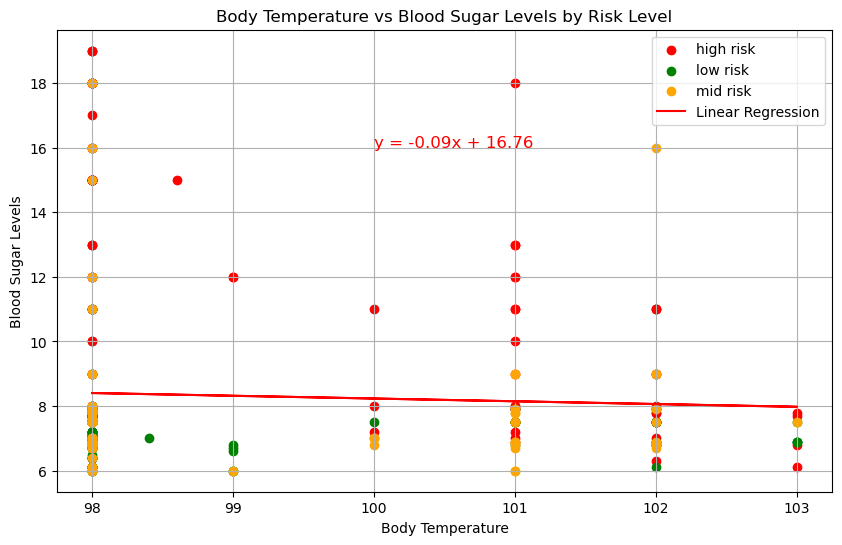

Correlation coefficient (r): -0.0425114793892211
The r square value is: 0.0018072258798601702


In [59]:
# Define x_values, y_values, and risk_levels 
x_values = data_df["BodyTemp"]
y_values = data_df["BS"]
risk_levels = data_df["RiskLevel"]

# Perform linear regression analysis
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = rvalue**2

# Define colors for each risk level
colors = {'high risk': 'red', 'mid risk': 'orange', 'low risk': 'green'}

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
for risk_level in risk_levels.unique():
    plt.scatter(x_values[risk_levels == risk_level], y_values[risk_levels == risk_level], label=risk_level, color=colors[risk_level])
plt.plot(x_values, regress_values, 'r-', label='Linear Regression')

# Annotate the line equation
plt.annotate(line_eq, (100, 16), fontsize=12, color='red')

# Add labels and title
plt.xlabel('Body Temperature')
plt.ylabel('Blood Sugar Levels')
plt.title('Body Temperature vs Blood Sugar Levels by Risk Level')
plt.legend()
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/bodytemp_bsugar.png")
# Show plot
plt.show()

# Print correlation coefficient
print("Correlation coefficient (r):", rvalue)
print(f"The r square value is: {r_squared}")

Analysis Report:
A correlation coefficient (r) of -0.04 indicates no relationship between blood sugar and body temperature.R square value of approximately 0.00181 between blood sugar and body temperature indicates that only about 0.18% of the variability in body temperature can be explained by blood sugar levels. 

# Relationship between Diastolic BP and Systolic BP

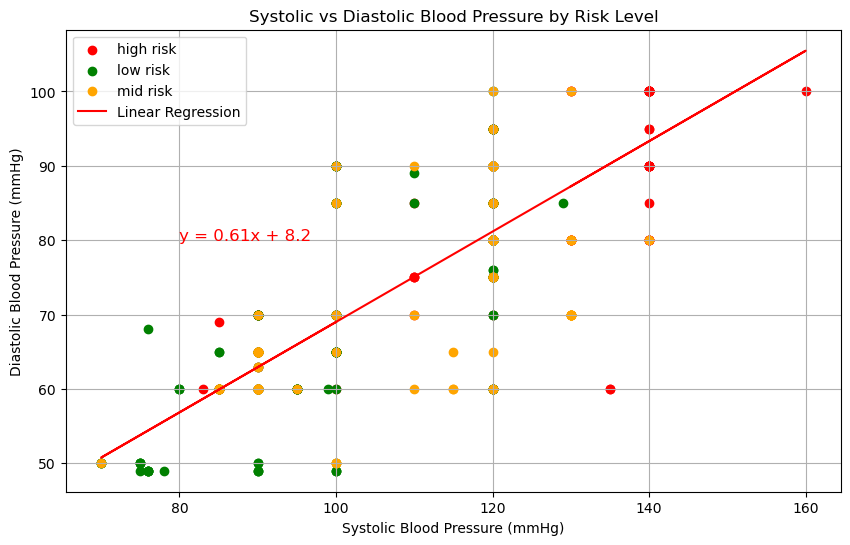

Correlation coefficient (r): 0.7900020726951189
The r square value is: 0.624103274862584


In [60]:
# Define x_values, y_values, and risk_levels 
x_values = data_df["SystolicBP"]
y_values = data_df["DiastolicBP"]
risk_levels = data_df["RiskLevel"]

# Perform linear regression analysis
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = rvalue**2

# Define colors for each risk level
colors = {'high risk': 'red', 'mid risk': 'orange', 'low risk': 'green'}

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
for risk_level in risk_levels.unique():
    plt.scatter(x_values[risk_levels == risk_level], y_values[risk_levels == risk_level], label=risk_level, color=colors[risk_level])
plt.plot(x_values, regress_values, 'r-', label='Linear Regression')

# Annotate the line equation
plt.annotate(line_eq, (80, 80), fontsize=12, color='red')

# Add labels and title
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.title('Systolic vs Diastolic Blood Pressure by Risk Level')
plt.legend()
plt.grid(True)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/sbp_dbp.png")
# Show plot
plt.show()

# Print correlation coefficient
print("Correlation coefficient (r):", rvalue)
print(f"The r square value is: {r_squared}")

Analysis Report:
A correlation coefficient (r) of 0.79 between Diastolic Blood Pressure and Systolic Blood Pressure indicates a strong positive linear relationship between the two variables.R square value of approximately 0.624 between diastolic blood pressure and systolic blood pressure suggests that approximately 62.4% of the variability in diastolic blood pressure can be explained by systolic blood pressure.  
As the diastolic BP increases>90 and Systolic BP increases >120, the risk level significantly increases.

# Analysis Summary:

- Health factors Age, Systolic BP, Diastolic BP and Blood Sugar affect the risk level of pregnancy. 
- Body temperature and heart rate do not affect risk levels.

Following Patterns / Trends were observed:
    - Pregnancy risk level increases when Systolic blood pressure > 120mmHg 
    - Pregnancy risk level increases when Diastolic blood pressure > 80mmHg 
    - Pregnancy risk level increases when blood sugar level > 8mmol/L
    - Pregnancy risk level increases with increase in age
    
Correlation between health variables:
    - Systolic BP and Diastolic BP has a has a strong positive linear relationship
    - Age and Systolic BP has a weak positive linear relationship
    - Age and Blood Sugar has a weak positive linear relationship 
    - Blood sugar and Systolic BP has a weak positive linear relationship 
    - Blood sugar and Diastolic BP has a a weak positive linear relationship 
    - Heart rate and Blood sugar has a very weak positive linear relationship 
    - Body temperature and Blood sugar had no relationship




